# Integers
In Python3 gli integer possono essere arbitrariamente grandi, precisione illiminata.
In Python2 hanno la precisione del sistema, es 64bit

In [12]:
# Max integer per un sistema a 64 bit, 2^63-1
import sys
print(sys.maxsize)

# Python3: integer illimitati
maxint = sys.maxsize+1
print(maxint)

9223372036854775807
9223372036854775808


Python trasforma automaticamente int in float se serve

In [23]:
print(2/3)

0.6666666666666666


## Binary and Hexadecimal representations

La conversione in binario (o in altre basi) segue la formula

$$d = (-1)^j\sum_{i=0}^{N} \alpha_i ~ b^i$$

dove $j$ e il bit per il segno e b=2 per il binario


|  j | 2^4 | 2^3 | 2^2 | 2^1 | 2^0 |
|---|---|---|---|---|---|
|  0 | 1 | 0 | 1 | 1 | 1  |

-> 1+2+4+16=+23


In [32]:
a = 30

# Binario e hexadecimal
a_bin = bin(a)
a_hex = hex(a)


print(a_bin)
print(a_hex)

# conversione in integer
print('Decimal representation of', a_bin, ':', int(a_bin, 2))
print('Decimal representation of', a_hex, ':', int(a_hex, 16))

0b11110
0x1e
Decimal representation of 0b11110 : 30
Decimal representation of 0x1e : 30


`float.hex()` converte i float in esadecimale

In [86]:
from math import pi as pi
print(pi)
print(pi.hex())

3.141592653589793
0x1.921fb54442d18p+1


## Bitwise operators
Operazioni sulle rappresentazioni in binario, bit a bit

### Logical operators

In [72]:
# Considerarli in binario
a = 60           # 60 = 0011 1100 
b = 13           # 13 = 0000 1101 

c = a & b        # 12 = 0000 1100
print("Bitwise AND", c)

c = a | b        # 61 = 0011 1101 
print("Bitwise OR ", c)

c = a ^ b        # 49 = 0011 0001
print("Bitwise XOR", c) #torna 1 solo quando sono diversi

c = ~a           # -61 = 1100 0011
print("Bitwise NOT(a) is", c) #inverte tutti i bit

Bitwise AND 12
Bitwise OR  61
Bitwise XOR 49
Bitwise NOT(a) is -61


### Masks and Shifts
Right shift (mette due zeri alla fine) o left shift (taglia due zeri)

In [75]:
a = 60           # 60 = 0011 1100 

c = a << 2       # 240 = 1111 0000
print("Left shift (towards most significant) of two positions ", c)

c = a >> 2       # 15 = 0000 1111
print("Right shift (towards least significant) of two positions ", c)

Left shift (towards most significant) of two positions  240
Right shift (towards least significant) of two positions  15


Link to the python [documentation](https://realpython.com/python-bitwise-operators/).

# Floating point numbers

I numeri non interi sono rappresentati in single da 32bit e double precision da 64 bit. 

$x_{float} = (-1)^s \times 1.f \times 2^{e-bias}$

- s: segno, 0 positivo, 1 negativo
- f: mantissa o fractional part, definita come $1.f=1+m_{n-1}2^{-1}+m_{n-2}2^{-2}+..+m_{0}2^{-n}$ con $m=0,1$
- e: exponent

Il bias e una costante aggiunta per avere i numeri minori di 1, vale sempre $max(e)/2$

### Overflow/Underflow
- *overflow*: valore assoluto oltre il range massimo, posto infinito
- *underflow*: troppo vicini a 0, imposti pari a 0

### Single

Per i single precision, $0\le e \le 255$ and $bias=127$. I 32 bit sono organizzati come 

|   | *s* | *e* | *f* |
|---|---|---|---|
| Bit position | 31 | 30-23 | 22-0 |
| Bits | 1 | 8 | 23 |

In [86]:
from IPython.display import Image
Image(url='http://www.dspguide.com/graphics/F_4_2.gif')

Convenzionalmente si definiscono i casi limite

|   |  conditions | value |
|---|---|---|
|  $+\infty$ | s=0, e=255, f=0 | +INF  |
|  $-\infty$ | s=1, e=255, f=0 | -INF  |
|  not a number | e=255, f>0  | NaN  |

Il max si ha per $f\sim 2$ and $e=254$, i.e. $2\times2^{127}\sim 3.4\times10^{38}$.

Il range per i float e $1.4\times 10^{-45} - 3.4\times 10^{38}$

### Double

Per i double, $0\le e \le 2047$ and $bias=1023$. I bit sono organizzati in

|   | *s* | *e* | *f* |
|---|---|---|---|
| Bit position | 63 | 62-52 | 51-0 |
| Bits | 1 | 11 | 52 |

Convenzionalmente si definiscono i casi limite

|   |  conditions | value |
|---|---|---|
|  $+\infty$ | s=0, e=2047, f=0 | +INF  |
|  $-\infty$ | s=1, e=2047, f=0 | -INF  |
|  not a number | e=2047, f>0  | NaN  |

Il range per i double e $2.2^{-308} - 1.8^{308}$

In Python, tutti i numeri sono double. Con float si intendono comunque double precision number

### Floating point numbers on your system

Per tutte le informazioni sui float in un pc, come range, precisione, digits usare ```sys.float_info```

[tutorial page](https://docs.python.org/2/library/sys.html#sys.float_info)

In [1]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


# Accuracy and dangerous calculations with floats
L'accuratezza dei float e di 6-7 cifre decimali per i single e 15-16 per i double; questo dipende dai bit riservati per la mantissa. Vedi $\epsilon$ sopra

La precision $\epsilon$ dei single e double e infatti pari a

In [52]:
# 23 bits for f in single
print("Single precision:", 2**-23)

# 53 bits for f in single
print("Double precision:", 2**-53)

Single precision: 1.1920928955078125e-07
Double precision: 1.1102230246251565e-16


Se imponiamo piu cifre decimali di quelle massime, il numero viene troncato

In [53]:
for e in [14, 15, 16]: print (7+1.0*10**-e)

7.00000000000001
7.000000000000001
7.0


Inoltre ricordiamo che numeri periodici in base 10 non e detto che lo siano in binario e viceversa. Ad esempio, $1/10$ in binario e periodico, 

$1/10=0.0001100110011001100110011001100110011001100110011...$

Percio alcuni test booleani (bitwise) `==` tra floating number possono dare risultati sbagliati

In [15]:
# Python e smart e corregge alcuni casi
print (1 / 10 == 0.1)

# falso, perche bitwise in binario non e vero
0.1 + 0.1 + 0.1 == 0.3

True


False

$\rightarrow$ *Mai fare test booleani tra float*

Oltre il numero di cifre predisposte, le operazioni sono fuori controllo 

In [69]:
print('%.30f' % (0.1)) # stampando troppe cifre, i risultati sono casuali

print(1 + 6.022e23 - 6.022e23)

0.100000000000000005551115123126
0.0


In [71]:
#proprieta associativa non funziona piu
print (6.022e23 - 6.022e23 + 1)
print (1 + 6.022e23 - 6.022e23)

1.0
0.0


In [82]:
#proprieta distributiva non e perfettamente rispettata bitwise

import math
a = math.exp(1)
b = math.pi
c = math.sin(1)
a*(b + c) == a*b + a*c

False

In [88]:
#identita non funzionano
x = 287475839859383374
print(x == int(float(x)))

False


## Functions and algorithms: well-conditioned and stable

Le funzioni possono soffrire di due classi di problemi derivanti dalla finita precisione

#### Function conditioning

Una funzione matematica $f(x)$ si dice **well-conditioned** se $f(x+\epsilon)\simeq f(x)$ per ogni $\epsilon$ piccolo.

In altre parole, $f(x)$ e well-conditioned se variando poco l'input l'output varia poco (funzione lipshitziana). L'effetto di una perturbazione non cambia troppo il risultato


#### Algorithm stability

Un computer algorithm $g(x)$ che rappresenta una funzione $f(x)$ e **numerically stable** se $g(x+\epsilon) \simeq f(x)$ per ogni $\epsilon$ piccolo. 

Un algoritmo **unstable** amplifica gli errori di approssimazione causati dalla precisione. Ad esempio $0.1 + 0.1 + 0.1 \neq 0.3$ in binario $\rightarrow f(0.1+0.1+0.1) \simeq f(0.3)$ se stable, non tiene conto delle piccole approx.


In general, we need both a well-conditioned problem and an algorihtm with sufficient numerical stabilty to obtain reliably accurate answers. In this case, we can be sure that $g(x) \simeq f(x)$.
Nella maggior parte dei casi i problemi si risolvono cambiando algoritmo.

1. Poorly-conditioned function: tangent at $\pi/2$ change a lot from $\frac{\pi}{2}^-$ to $\frac{\pi}{2}^+$

In [97]:
import math

x1 = 1.57078
x2 = 1.57079
t1 = math.tan(x1)
t2 = math.tan(x2)

print ('tan(x1) =', t1)
print ('tan(x2) =', t2)
print ('% change in x =', 100.0*(x2-x1)/x1, '%')
print ('% change in tan(x) =', (100.0*(t2-t1)/t1), '%')

tan(x1) = 61249.00853150303
tan(x2) = 158057.9134162482
% change in x = 0.0006366263894271296 %
% change in tan(x) = 158.05791343536953 %


2. Numerically unstable algorithm:   plot di    $f(x)=\frac{1-\cos(x)}{x^2}=1/2$ vicino a 0

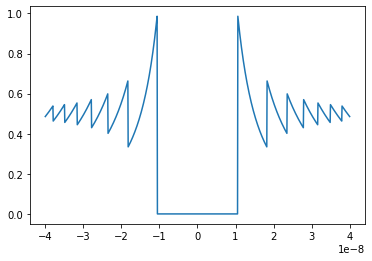

In [112]:
#Plottando molto vicino a 0 non funziona

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1 - np.cos(x))/(x*x)

x = np.linspace(-4e-8, 4e-8, 1000)
plt.plot(x, f(x))

Numerically stable if we rewrite using $1-\cos(x)$ = $2 \sin^2 (\frac{x}{2})$

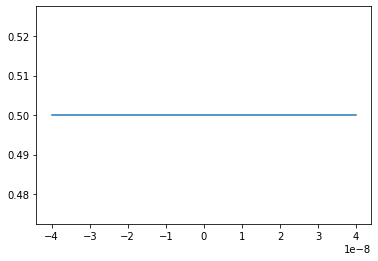

In [114]:
def f1(x):
    return 2*np.sin(x/2)**2/(x*x)

x = np.linspace(-4e-8, 4e-8, 1000)
plt.plot(x, f1(x))

3. Numerically unstable algorithm: stable and unstable variance

$s^2 = \frac{1}{n-1} \sum (x-\bar{x})^2$

In [121]:
# direct method: squaring occuring after subtraction
def direct_var(x):
    n = len(x)
    xbar = np.mean(x)
    return 1.0/(n-1)*np.sum((x - xbar)**2)

# sum of squares method (vectorized version): subtraction of two large numbers fail
def sum_of_squers_var(x):
    n = len(x)
    return (1.0/(n*(n-1))*(n*np.sum(x**2) - (np.sum(x))**2))

# Welford's method
def welford_var(x):
    s = 0
    m = x[0]
    for i in range(1, len(x)):
        m += (x[i]-m)/i
        s += (x[i]-m)**2
    return s/(len(x) - 1)


# uniform numbers around 1e12 
x_ = np.random.uniform(0, 1, int(1e3))
x = 1e12 + x_

# comparing the 4 methods
print("Numpy:", np.var(x_))
print("Direct:", direct_var(x))
print("Sum of squares:", sum_of_squers_var(x))
print("Welford's:", welford_var(x))

Numpy: 0.08345967309602284
Direct: 0.08354314275690027
Sum of squares: -140878366.72205004
Welford's: 0.08284276756677064


4. Unstable algorithm: log-Likelihood $\mathcal{L} = \prod_{i=0}^{N} Poisson(x, \mu)$

In [130]:
# loss of precision can be a problem when calculating Likelihoods
probs = np.random.random(1000) # Generating 1000 random numbers between 0 and 1, as if they were probabilities

print("L =", np.prod(probs))
print("log L =", np.sum(np.log(probs)))

L = 0.0
log L = -1008.4932290356714


#### Summary:

- Well-/ill-Conditioned refers to the problem; Stable/Unstable refers to an algorithm or numerical process.
- If the problem is well-conditioned then a stable algorithm can be found.
- If the problem is ill-conditioned then there is no reliable way to solve it in a stable way.
- Mixing roundoff-error with an unstable process is a recipe for disaster.
- With exact arithmetic (no roundoff-error), stability is not a concern.